# Predict the number of wins (W) for a given team in baseball with Linear Regression

In [53]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Load data
ds=pd.read_csv('baseball (1).csv')

In [55]:
ds.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [56]:
ds.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [57]:
ds.shape

(30, 17)

In [58]:
ds.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [59]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Summary statistics

In [60]:
ds.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


All standard deviations seem to be within a normal range.

Data visualzations

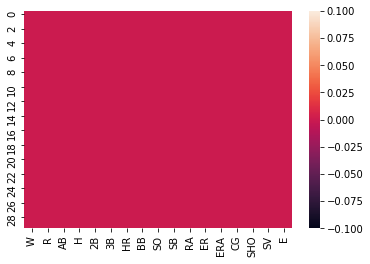

In [61]:
sns.heatmap(ds.isnull())

No null values present.

In [62]:
dscor=ds.corr()
dscor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


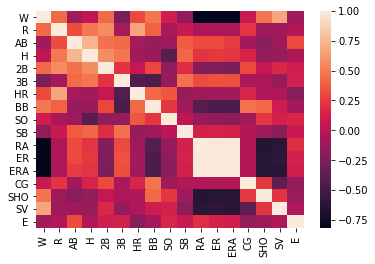

In [63]:
sns.heatmap(dscor)

Columns 'RA,ER and ERA'can definitely be dropped as they don't have positive correlation with W. Columns 'AB,3B,SB and E'can be dropped in a different run and the results compared.

The features that correlate best are 'R,2B,HR,BB,SHO,SV'

Plotting outliers

In [64]:
ds.shape

(30, 17)

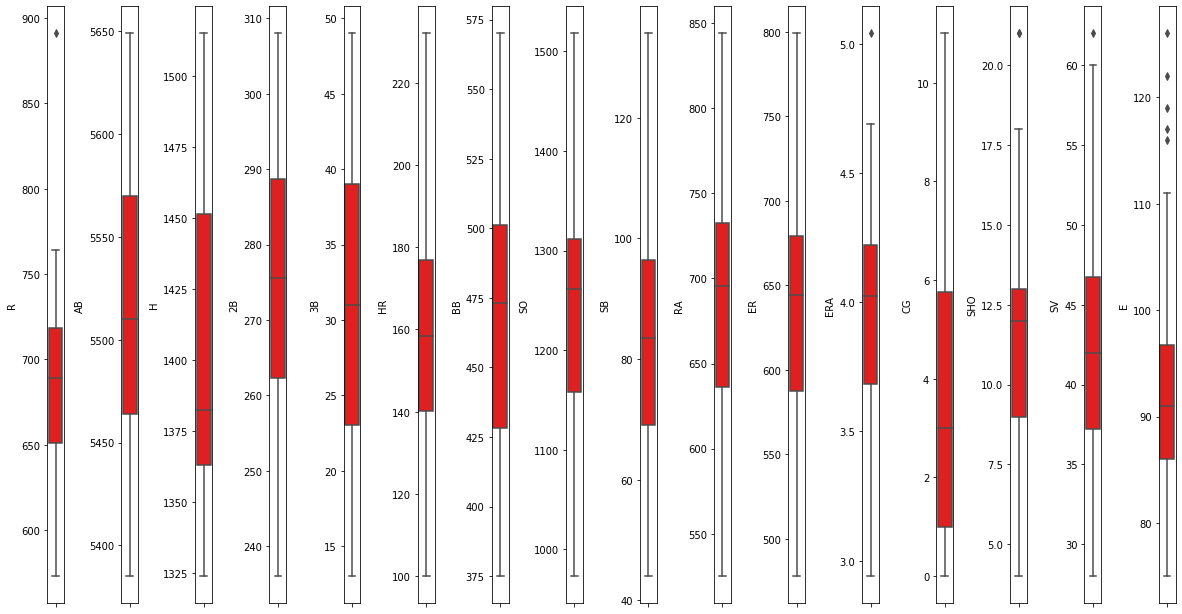

In [65]:
# Show boxplots for all columns, check outliers
collist=ds.columns.values
ncol=17
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(ds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [66]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(ds))
print(ds.shape)
cds=ds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(30, 17)
(29, 17)


# Check and correct skewness

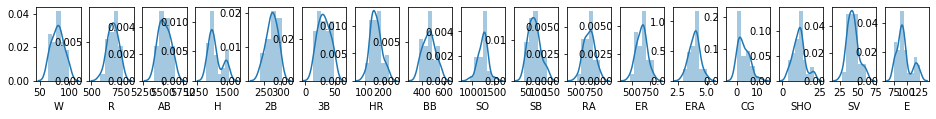

In [67]:
# Show distribution plots for all columns
collist=cds.columns.values
ncol=17
nrows=10

plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(cds[collist[i]])

Very little skewness present

In [68]:
# Show skewness (less than 0.55 is ok)
cds.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [69]:
#Treat skewness using log
for col in cds.columns:
    if cds.skew().loc[col]>0.55:
        ds[col]=np.log1p(cds[col])

In [70]:
cds.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Skewness is closer but not perfect

In [71]:
cds.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [72]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=cds.drop(columns=['AB', 'H', '3B', 'SO', 'SB', 'CG','E'])

In [73]:
nds.skew()

W      0.119013
R     -0.215364
2B    -0.335304
HR     0.450862
BB     0.151193
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
dtype: float64

# Spit dataset into x and y

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from sklearn import linear_model

In [75]:
nds.columns

Index(['W', 'R', '2B', 'HR', 'BB', 'RA', 'ER', 'ERA', 'SHO', 'SV'], dtype='object')

In [76]:
# Lineup target and input values
nds_x=nds.drop(columns=['W'])
nds_y=nds[['W']]

In [77]:
#Scaling for linear regression
sc=StandardScaler()
x=sc.fit_transform(nds_x)
x=pd.DataFrame(x,columns=nds_x.columns)

In [78]:
x.skew()

R     -0.215364
2B    -0.335304
HR     0.450862
BB     0.151193
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
dtype: float64

In [79]:
# Train test split
x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=55, test_size=0.20)

# Linear regression

In [80]:
# Error calculation
max_r_score=0
for r_state in range(42,100):
    x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("Max r2 score for",final_r_state,"is", max_r_score)

Max r2 score for 69 is 0.9790280525784202


In [81]:
# Crossvalidation
cross_val_score(linear_model.LinearRegression(),x,nds_y,cv=10,scoring='r2').mean()

-3.3526673843249895

In [82]:
# R2 score gives us a rondom state of 69
x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=69, test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [83]:
# R2 and Mean squared error statements
print('r score is: ',r2_score(y_test,y_pred))
print('RMSE is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

r score is:  0.9790280525784202
RMSE is:  1.8121416704447726


These are good scores.

# SVR Regression

In [84]:
# Loop for SVR types
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.832674344032556
0.638476843164345
0.3199800505892493


# Other models

In [85]:
# Best parameters for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,18)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 1}

In [86]:
knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(x_train,y_train)
print(knr.score(x_train,y_train))

1.0


In [87]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
# Prepare a range of alpha values to test
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
# Create and fit a Ridge regression model to test each alpha
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)

#Summarize the results of the grid search

print(grid.best_estimator_.alpha)

1


In [88]:
# Create and fit a Ridge regression model to test each alpha
model2=Lasso()
grid=GridSearchCV(estimator=model2,param_grid=alphavalue)
grid.fit(x_train,y_train)

#Summarize the results of the grid search

print(grid.best_estimator_.alpha)

0.1


In [89]:
# x_train,x_test,y_train, y_test
# Try to minimize the coefficient variance

rd=Ridge(alpha=1)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.8616596925223197

In [90]:
# x_train,x_test,y_train, y_test
# Try to minimize the coefficient variance

las=Lasso(alpha=0.1)
las.fit(x_train,y_train)
las.score(x_train,y_train)

0.8622308977841445

I choose the KNeigborsRegressor model as it gave a perfect score of 100%.

# Save the model

In [91]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(knr,'Baseball.pkl')

['Baseball.pkl']

In [92]:
# Load and use model to make a prediction
model=joblib.load('Baseball.pkl')
model.predict(x_test)

array([[76.],
       [80.],
       [97.],
       [84.],
       [74.],
       [80.]])